# 데이터 활용 추가 분석

EDA에서 저장한 3개 파일을 활용한 심화 분석:
- `episode_statistics.csv`: 에피소드별 통계
- `final_pass_data.csv`: 최종 패스 데이터
- `pass_analysis.csv`: 패스 분석 데이터

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
sns.set_style('whitegrid')

print("라이브러리 로드 완료!")

라이브러리 로드 완료!


## 1. 저장된 데이터 로드

In [2]:
# 저장된 파일 읽기
episode_stats = pd.read_csv('episode_statistics.csv')
final_pass = pd.read_csv('final_pass_data.csv')
pass_analysis = pd.read_csv('pass_analysis.csv')

print("✅ 데이터 로드 완료!")
print(f"\nepisode_statistics: {episode_stats.shape}")
print(f"final_pass_data: {final_pass.shape}")
print(f"pass_analysis: {pass_analysis.shape}")

# 데이터 미리보기
print("\n[episode_statistics 샘플]")
display(episode_stats.head())

print("\n[final_pass_data 샘플]")
display(final_pass.head())

print("\n[pass_analysis 샘플]")
display(pass_analysis.head())

✅ 데이터 로드 완료!

episode_statistics: (15435, 6)
final_pass_data: (15435, 15)
pass_analysis: (178582, 5)

[episode_statistics 샘플]


,game_episode,총_액션수,시작시간,종료시간,액션타입분포,에피소드길이(초)
0,126283_1,49,0.667,124.367,"{'Pass': 24, 'Carry': 14, 'Recovery': 4, 'Inte...",123.700
1,126283_10,2,694.325,695.473,"{'Pass_Corner': 1, 'Pass': 1}",1.148
2,126283_11,96,710.967,894.237,"{'Pass': 53, 'Carry': 24, 'Tackle': 5, 'Interc...",183.270
3,126283_12,3,938.900,940.933,"{'Pass': 2, 'Throw-In': 1}",2.033
4,126283_13,28,944.567,997.233,"{'Pass': 13, 'Carry': 8, 'Recovery': 3, 'Throw...",52.666



[final_pass_data 샘플]


,game_episode,game_id,period_id,episode_id,time_seconds,team_id,player_id,action_id,type_name,result_name,start_x,start_y,end_x,end_y,is_home
0,126283_1,126283,1,1,124.367,2354,500146,68,Pass,Successful,101.054205,52.757324,97.134030,41.793072,True
1,126283_10,126283,1,10,695.473,4639,412018,425,Pass,Successful,102.213510,51.930444,95.680830,59.465320,False
2,126283_11,126283,1,11,894.237,4639,97086,573,Pass,Successful,67.934265,11.028172,90.346515,14.220024,False
3,126283_12,126283,1,12,940.933,2354,61979,588,Pass,Unsuccessful,80.991120,66.827109,81.475905,65.480029,True
4,126283_13,126283,1,13,997.233,4639,142258,629,Pass,Unsuccessful,14.527695,21.594692,71.613255,0.000000,False



[pass_analysis 샘플]


,game_episode,pass_distance,pass_angle,delta_x,delta_y
0,126283_1,21.632581,167.209120,-21.095760,4.789308
1,126283_1,9.191143,-54.341176,5.358045,-7.467828
2,126283_1,19.446210,-101.323468,-3.818220,-19.067676
3,126283_1,18.172472,137.063513,-13.304235,12.378856
4,126283_1,11.109066,101.911328,-2.292885,10.869868


## 2. 분석 1: 에피소드 복잡도와 최종 패스 위치

In [3]:
print("=" * 80)
print("에피소드 복잡도별 최종 패스 위치 분석")
print("=" * 80)

# 에피소드 통계와 최종 패스 데이터 병합
merged = episode_stats.merge(
    final_pass[['game_episode', 'end_x', 'end_y']], 
    on='game_episode', 
    how='inner'
)

print(f"\n병합된 데이터 크기: {merged.shape}")

# 액션 수에 따른 복잡도 그룹 생성
merged['complexity'] = pd.cut(
    merged['총_액션수'],
    bins=[0, 5, 10, 15, 100],
    labels=['짧음(1-5)', '보통(6-10)', '긴(11-15)', '매우긴(16+)']
)

# 복잡도별 통계
complexity_stats = merged.groupby('complexity').agg({
    'end_x': ['mean', 'std', 'min', 'max'],
    'end_y': ['mean', 'std', 'min', 'max'],
    'game_episode': 'count'
}).round(2)

print("\n[복잡도 그룹별 통계]")
display(complexity_stats)

에피소드 복잡도별 최종 패스 위치 분석

병합된 데이터 크기: (15435, 8)

[복잡도 그룹별 통계]


end_x                      end_y                   game_episode
             mean    std   min    max   mean    std  min   max        count
complexity                                                                 
짧음(1-5)     67.38  24.88  0.00  105.0  33.52  25.79  0.0  68.0         2364
보통(6-10)    67.48  23.16  0.00  105.0  33.22  24.62  0.0  68.0         2886
긴(11-15)    67.89  23.56  0.00  105.0  34.05  24.29  0.0  68.0         2171
매우긴(16+)    69.23  23.87  0.01  105.0  33.70  23.84  0.0  68.0         7849

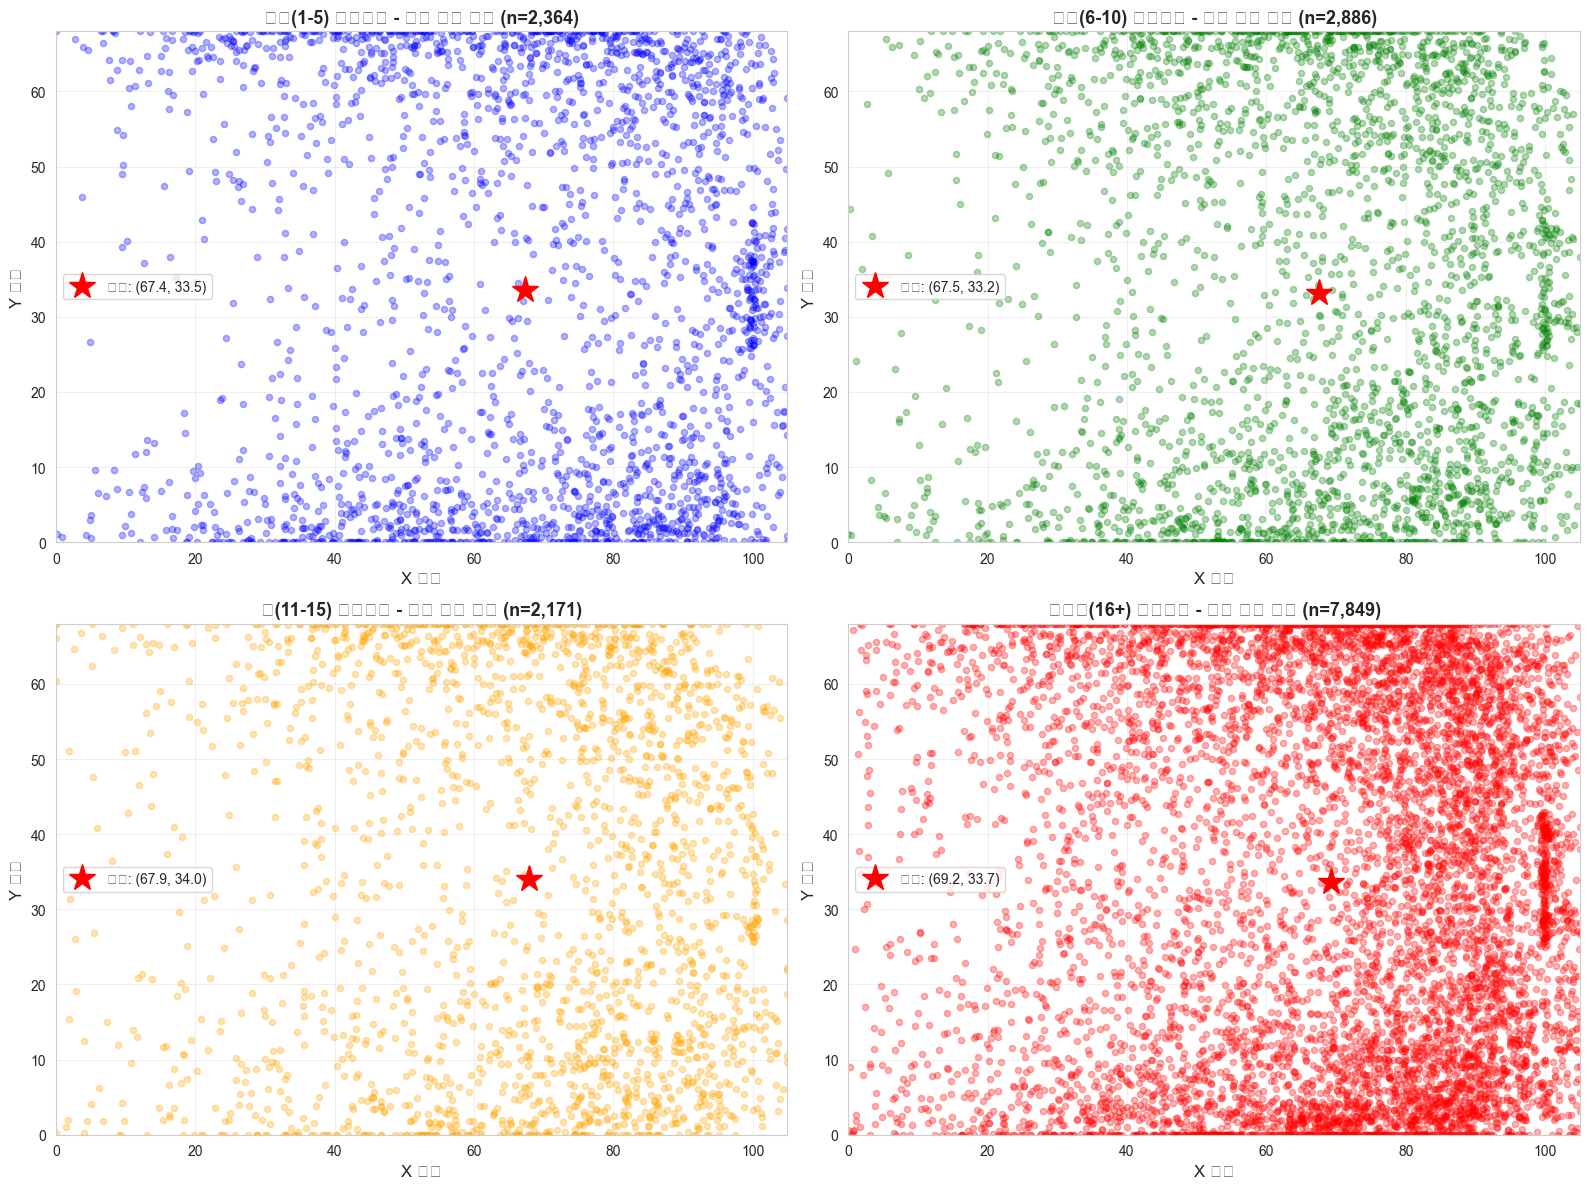


💡 인사이트: 에피소드가 길수록 최종 패스 위치의 분산이 커짐


In [4]:
# 복잡도별 최종 패스 위치 시각화
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

groups = ['짧음(1-5)', '보통(6-10)', '긴(11-15)', '매우긴(16+)']
colors = ['blue', 'green', 'orange', 'red']

for idx, (group, color) in enumerate(zip(groups, colors)):
    data = merged[merged['complexity'] == group]
    
    axes[idx].scatter(data['end_x'], data['end_y'], alpha=0.3, s=20, color=color)
    axes[idx].set_xlim(0, 105)
    axes[idx].set_ylim(0, 68)
    axes[idx].set_xlabel('X 좌표', fontsize=12)
    axes[idx].set_ylabel('Y 좌표', fontsize=12)
    axes[idx].set_title(f'{group} 에피소드 - 최종 패스 위치 (n={len(data):,})', 
                        fontsize=13, fontweight='bold')
    axes[idx].grid(True, alpha=0.3)
    
    # 평균 위치 표시
    mean_x, mean_y = data['end_x'].mean(), data['end_y'].mean()
    axes[idx].plot(mean_x, mean_y, 'r*', markersize=20, 
                   label=f'평균: ({mean_x:.1f}, {mean_y:.1f})')
    axes[idx].legend()

plt.tight_layout()
plt.show()

print("\n💡 인사이트: 에피소드가 길수록 최종 패스 위치의 분산이 커짐")

## 3. 분석 2: 패스 누적 이동량과 최종 위치 상관관계

In [5]:
print("=" * 80)
print("패스 누적 이동량 분석")
print("=" * 80)

# 에피소드별 패스 통계 집계
episode_pass_stats = pass_analysis.groupby('game_episode').agg({
    'pass_distance': ['mean', 'max', 'sum'],
    'delta_x': 'sum',
    'delta_y': 'sum'
}).reset_index()

episode_pass_stats.columns = [
    'game_episode', 'avg_pass_dist', 'max_pass_dist', 
    'total_pass_dist', 'total_delta_x', 'total_delta_y'
]

print("\n[에피소드별 패스 통계]")
display(episode_pass_stats.head())

# 최종 위치와 병합
correlation_data = episode_pass_stats.merge(
    final_pass[['game_episode', 'end_x', 'end_y']],
    on='game_episode'
)

print(f"\n병합 데이터 크기: {correlation_data.shape}")

패스 누적 이동량 분석

[에피소드별 패스 통계]


,game_episode,avg_pass_dist,max_pass_dist,total_pass_dist,total_delta_x,total_delta_y
0,126283_1,21.461118,60.547696,515.066823,52.950880,0.124856
1,126283_10,9.972475,9.972475,9.972475,-6.532680,7.534876
2,126283_11,16.273256,47.592405,862.482570,14.841645,-30.954634
3,126283_12,2.767462,4.103267,5.534923,-3.479385,-0.287762
4,126283_13,25.591313,61.033531,332.687070,138.112380,41.386446



병합 데이터 크기: (15435, 8)


In [6]:
# 상관관계 분석
corr_cols = ['avg_pass_dist', 'max_pass_dist', 'total_delta_x', 'total_delta_y', 'end_x', 'end_y']
correlation_matrix = correlation_data[corr_cols].corr()

print("[상관관계 매트릭스]")
display(correlation_matrix.round(3))

print("\n[핵심 상관관계]")
print(f"total_delta_x vs end_x: {correlation_matrix.loc['total_delta_x', 'end_x']:.3f}")
print(f"total_delta_y vs end_y: {correlation_matrix.loc['total_delta_y', 'end_y']:.3f}")

if abs(correlation_matrix.loc['total_delta_x', 'end_x']) > 0.7:
    print("\n✅ total_delta_x와 end_x는 강한 양의 상관관계!")
if abs(correlation_matrix.loc['total_delta_y', 'end_y']) > 0.7:
    print("✅ total_delta_y와 end_y는 강한 양의 상관관계!")

[상관관계 매트릭스]


,avg_pass_dist,max_pass_dist,total_delta_x,total_delta_y,end_x,end_y
avg_pass_dist,1.000,0.614,0.206,-0.001,0.074,-0.021
max_pass_dist,0.614,1.000,0.578,-0.018,0.084,-0.018
total_delta_x,0.206,0.578,1.000,-0.016,0.108,-0.014
total_delta_y,-0.001,-0.018,-0.016,1.000,-0.006,0.383
end_x,0.074,0.084,0.108,-0.006,1.000,-0.020
end_y,-0.021,-0.018,-0.014,0.383,-0.020,1.000



[핵심 상관관계]
total_delta_x vs end_x: 0.108
total_delta_y vs end_y: 0.383


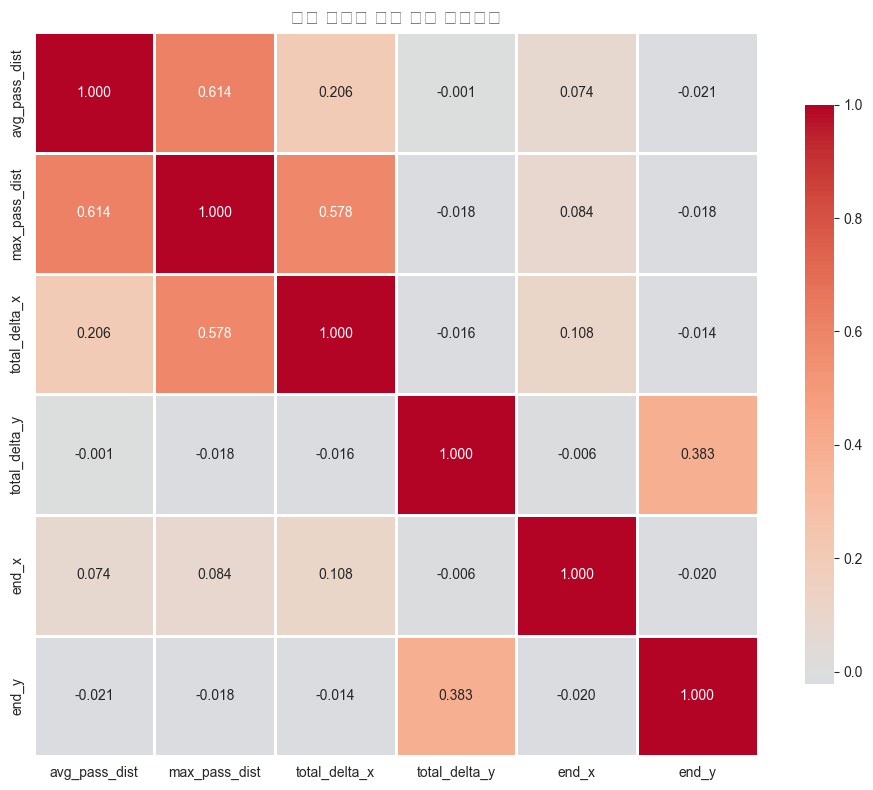

In [7]:
# 상관관계 히트맵
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.3f', cmap='coolwarm',
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('패스 패턴과 최종 위치 상관관계', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

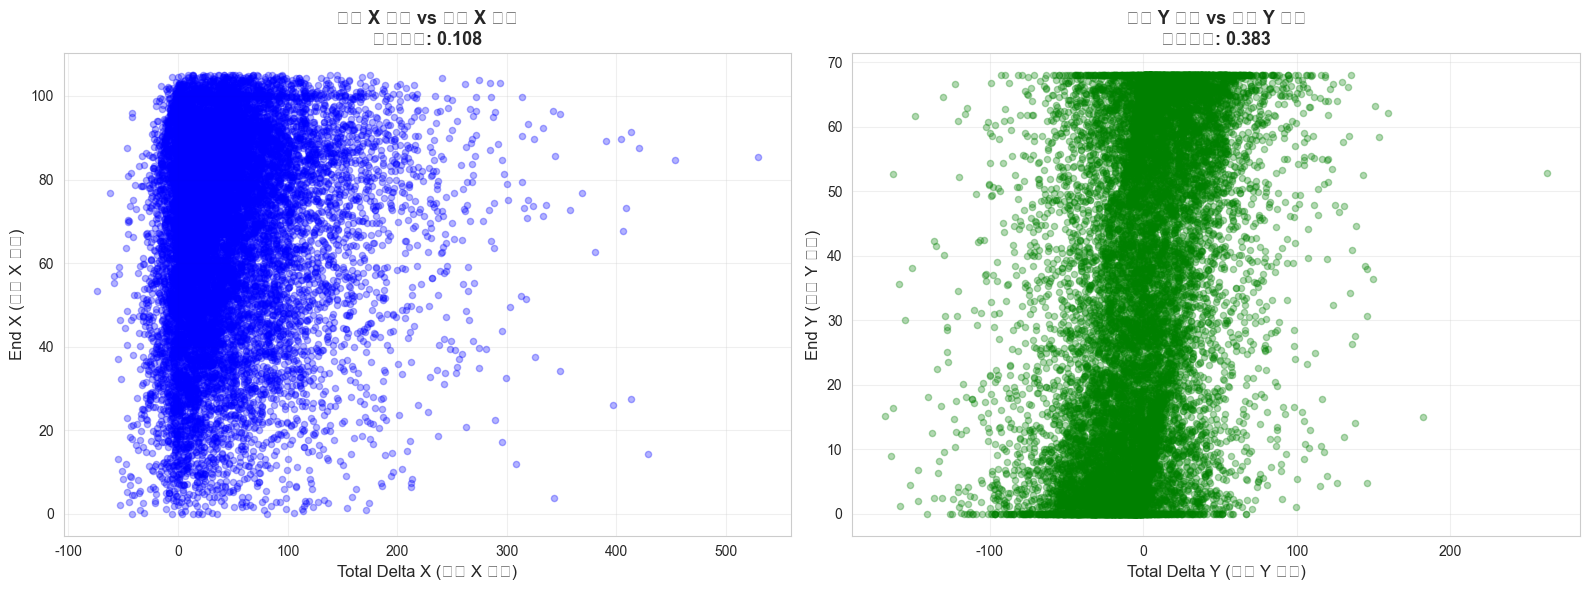


💡 누적 이동량은 최종 위치를 예측하는 핵심 피처!


In [8]:
# 누적 이동량 vs 최종 위치 산점도
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# delta_x vs end_x
axes[0].scatter(correlation_data['total_delta_x'], correlation_data['end_x'], 
                alpha=0.3, s=20, color='blue')
axes[0].set_xlabel('Total Delta X (누적 X 이동)', fontsize=12)
axes[0].set_ylabel('End X (최종 X 위치)', fontsize=12)
axes[0].set_title(f'누적 X 이동 vs 최종 X 위치\n상관계수: {correlation_matrix.loc["total_delta_x", "end_x"]:.3f}',
                  fontsize=13, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# delta_y vs end_y
axes[1].scatter(correlation_data['total_delta_y'], correlation_data['end_y'], 
                alpha=0.3, s=20, color='green')
axes[1].set_xlabel('Total Delta Y (누적 Y 이동)', fontsize=12)
axes[1].set_ylabel('End Y (최종 Y 위치)', fontsize=12)
axes[1].set_title(f'누적 Y 이동 vs 최종 Y 위치\n상관계수: {correlation_matrix.loc["total_delta_y", "end_y"]:.3f}',
                  fontsize=13, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n💡 누적 이동량은 최종 위치를 예측하는 핵심 피처!")

## 4. 분석 3: 경기장 구역별 최종 패스 분포

In [9]:
print("=" * 80)
print("경기장 구역 분석")
print("=" * 80)

def get_zone(x, y):
    """경기장을 9개 구역으로 분류"""
    # X 방향: 수비(0-35), 중앙(35-70), 공격(70-105)
    if x < 35:
        x_zone = '수비'
    elif x < 70:
        x_zone = '중앙'
    else:
        x_zone = '공격'
    
    # Y 방향: 왼쪽(0-22.67), 중앙(22.67-45.33), 오른쪽(45.33-68)
    if y < 22.67:
        y_zone = '왼쪽'
    elif y < 45.33:
        y_zone = '중앙'
    else:
        y_zone = '오른쪽'
    
    return f"{x_zone}_{y_zone}"

# 구역 분류
final_pass['zone'] = final_pass.apply(
    lambda row: get_zone(row['end_x'], row['end_y']), axis=1
)

# 구역별 분포
zone_dist = final_pass['zone'].value_counts()
zone_pct = (zone_dist / len(final_pass) * 100).round(2)

zone_df = pd.DataFrame({
    '구역': zone_dist.index,
    '빈도': zone_dist.values,
    '비율(%)': zone_pct.values
})

print("\n[구역별 최종 패스 분포]")
display(zone_df)

경기장 구역 분석

[구역별 최종 패스 분포]


,구역,빈도,비율(%)
0,공격_왼쪽,3315,21.48
1,공격_오른쪽,3108,20.14
2,중앙_왼쪽,2261,14.65
3,중앙_오른쪽,2250,14.58
4,공격_중앙,2067,13.39
5,수비_오른쪽,752,4.87
6,중앙_중앙,726,4.70
7,수비_왼쪽,722,4.68
8,수비_중앙,234,1.52


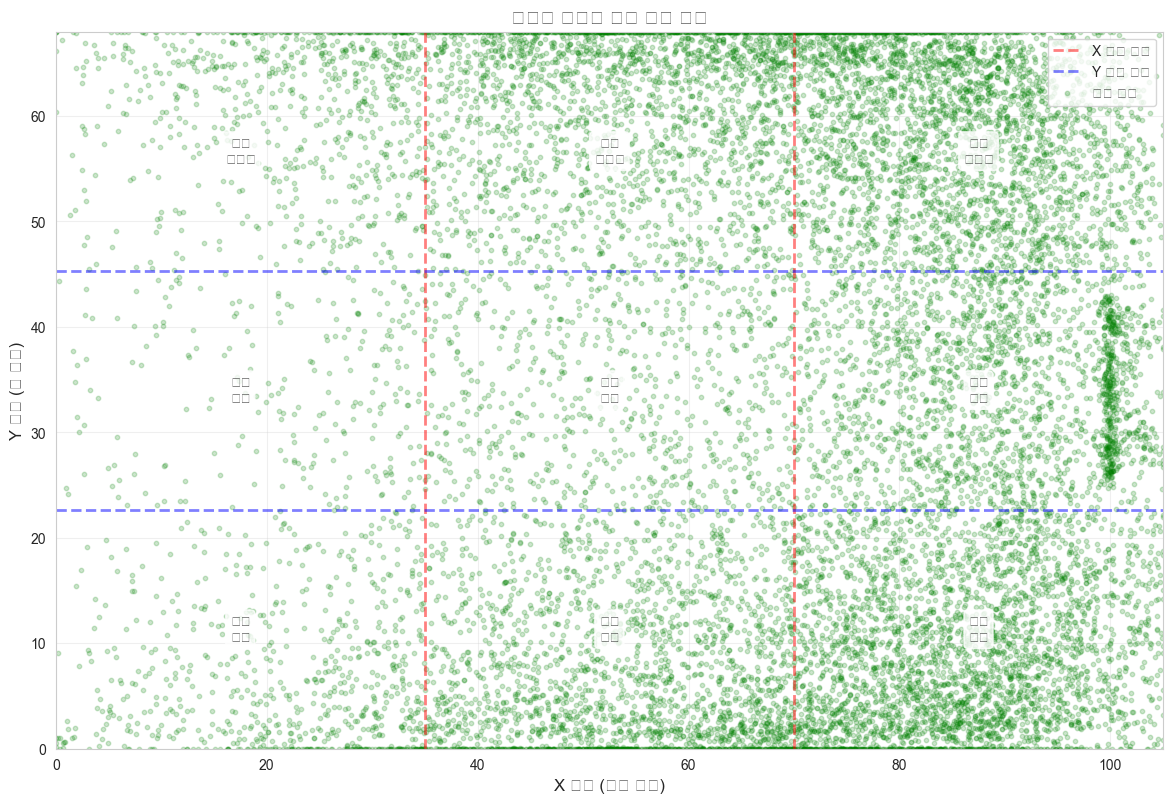


💡 가장 많은 최종 패스가 발생하는 구역: 공격_왼쪽 (21.48%)


In [10]:
# 경기장 구역 시각화
fig, ax = plt.subplots(figsize=(12, 8))

ax.set_xlim(0, 105)
ax.set_ylim(0, 68)
ax.set_aspect('equal')

# 구역 경계선
ax.axvline(35, color='red', linestyle='--', linewidth=2, alpha=0.5, label='X 구역 경계')
ax.axvline(70, color='red', linestyle='--', linewidth=2, alpha=0.5)
ax.axhline(22.67, color='blue', linestyle='--', linewidth=2, alpha=0.5, label='Y 구역 경계')
ax.axhline(45.33, color='blue', linestyle='--', linewidth=2, alpha=0.5)

# 최종 패스 위치
ax.scatter(final_pass['end_x'], final_pass['end_y'], 
           alpha=0.2, s=10, c='green', label='최종 패스')

# 구역 라벨
zones = [
    (17.5, 11.33, '수비\n왼쪽'), (17.5, 34, '수비\n중앙'), (17.5, 56.67, '수비\n오른쪽'),
    (52.5, 11.33, '중앙\n왼쪽'), (52.5, 34, '중앙\n중앙'), (52.5, 56.67, '중앙\n오른쪽'),
    (87.5, 11.33, '공격\n왼쪽'), (87.5, 34, '공격\n중앙'), (87.5, 56.67, '공격\n오른쪽')
]

for x, y, label in zones:
    ax.text(x, y, label, fontsize=10, ha='center', va='center',
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

ax.set_xlabel('X 좌표 (길이 방향)', fontsize=12)
ax.set_ylabel('Y 좌표 (폭 방향)', fontsize=12)
ax.set_title('경기장 구역별 최종 패스 분포', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3)
ax.legend(loc='upper right')

plt.tight_layout()
plt.show()

print(f"\n💡 가장 많은 최종 패스가 발생하는 구역: {zone_df.iloc[0]['구역']} ({zone_df.iloc[0]['비율(%)']}%)")

## 5. 분석 4: 간단한 베이스라인 모델

In [11]:
print("=" * 80)
print("베이스라인 예측 모델 (Random Forest)")
print("=" * 80)

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

# 모델링용 데이터 준비
modeling_data = episode_stats.merge(episode_pass_stats, on='game_episode', how='inner')
modeling_data = modeling_data.merge(
    final_pass[['game_episode', 'end_x', 'end_y']], 
    on='game_episode', 
    how='inner'
)

print(f"\n모델링 데이터 크기: {modeling_data.shape}")

# 피처 선택
feature_cols = [
    '총_액션수', '에피소드길이(초)', 
    'avg_pass_dist', 'max_pass_dist',
    'total_delta_x', 'total_delta_y'
]

X = modeling_data[feature_cols].fillna(0)
y_x = modeling_data['end_x']
y_y = modeling_data['end_y']

print(f"\n사용 피처: {feature_cols}")
print(f"피처 데이터 크기: {X.shape}")

베이스라인 예측 모델 (Random Forest)

모델링 데이터 크기: (15435, 13)

사용 피처: ['총_액션수', '에피소드길이(초)', 'avg_pass_dist', 'max_pass_dist', 'total_delta_x', 'total_delta_y']
피처 데이터 크기: (15435, 6)


In [12]:
# Train/Test 분할 (80/20)
X_train, X_test, y_train_x, y_test_x, y_train_y, y_test_y = train_test_split(
    X, y_x, y_y, test_size=0.2, random_state=42
)

print(f"학습 데이터: {X_train.shape[0]:,} 샘플")
print(f"테스트 데이터: {X_test.shape[0]:,} 샘플")

학습 데이터: 12,348 샘플
테스트 데이터: 3,087 샘플


In [13]:
# X 좌표 예측 모델
print("\n[X 좌표 예측 모델 학습 중...]")
rf_x = RandomForestRegressor(
    n_estimators=100, 
    max_depth=10, 
    random_state=42, 
    n_jobs=-1,
    verbose=0
)
rf_x.fit(X_train, y_train_x)
pred_x = rf_x.predict(X_test)

mae_x = mean_absolute_error(y_test_x, pred_x)
rmse_x = np.sqrt(mean_squared_error(y_test_x, pred_x))

print("✅ 완료!")
print(f"   MAE: {mae_x:.3f}")
print(f"   RMSE: {rmse_x:.3f}")


[X 좌표 예측 모델 학습 중...]
✅ 완료!
   MAE: 19.079
   RMSE: 23.114


In [14]:
# Y 좌표 예측 모델
print("\n[Y 좌표 예측 모델 학습 중...]")
rf_y = RandomForestRegressor(
    n_estimators=100, 
    max_depth=10, 
    random_state=42, 
    n_jobs=-1,
    verbose=0
)
rf_y.fit(X_train, y_train_y)
pred_y = rf_y.predict(X_test)

mae_y = mean_absolute_error(y_test_y, pred_y)
rmse_y = np.sqrt(mean_squared_error(y_test_y, pred_y))

print("✅ 완료!")
print(f"   MAE: {mae_y:.3f}")
print(f"   RMSE: {rmse_y:.3f}")


[Y 좌표 예측 모델 학습 중...]
✅ 완료!
   MAE: 18.333
   RMSE: 21.463


In [15]:
# 모델 성능 요약
print("\n" + "=" * 80)
print("베이스라인 모델 성능")
print("=" * 80)
print(f"\nX 좌표 예측")
print(f"  - MAE: {mae_x:.3f} (경기장 길이 105 대비 {mae_x/105*100:.1f}%)")
print(f"  - RMSE: {rmse_x:.3f}")

print(f"\nY 좌표 예측")
print(f"  - MAE: {mae_y:.3f} (경기장 폭 68 대비 {mae_y/68*100:.1f}%)")
print(f"  - RMSE: {rmse_y:.3f}")

print("\n💡 이것은 매우 간단한 통계 피처만 사용한 베이스라인입니다!")


베이스라인 모델 성능

X 좌표 예측
  - MAE: 19.079 (경기장 길이 105 대비 18.2%)
  - RMSE: 23.114

Y 좌표 예측
  - MAE: 18.333 (경기장 폭 68 대비 27.0%)
  - RMSE: 21.463

💡 이것은 매우 간단한 통계 피처만 사용한 베이스라인입니다!


In [16]:
# 피처 중요도 분석
importance_x = pd.DataFrame({
    '피처': feature_cols,
    '중요도': rf_x.feature_importances_
}).sort_values('중요도', ascending=False)

importance_y = pd.DataFrame({
    '피처': feature_cols,
    '중요도': rf_y.feature_importances_
}).sort_values('중요도', ascending=False)

print("\n[X 좌표 예측 - 피처 중요도]")
display(importance_x)

print("\n[Y 좌표 예측 - 피처 중요도]")
display(importance_y)


[X 좌표 예측 - 피처 중요도]


,피처,중요도
4,total_delta_x,0.307037
3,max_pass_dist,0.162985
2,avg_pass_dist,0.157314
1,에피소드길이(초),0.153411
5,total_delta_y,0.142885
0,총_액션수,0.076368



[Y 좌표 예측 - 피처 중요도]


,피처,중요도
5,total_delta_y,0.529032
0,총_액션수,0.105723
4,total_delta_x,0.105054
1,에피소드길이(초),0.095104
2,avg_pass_dist,0.082599
3,max_pass_dist,0.082487


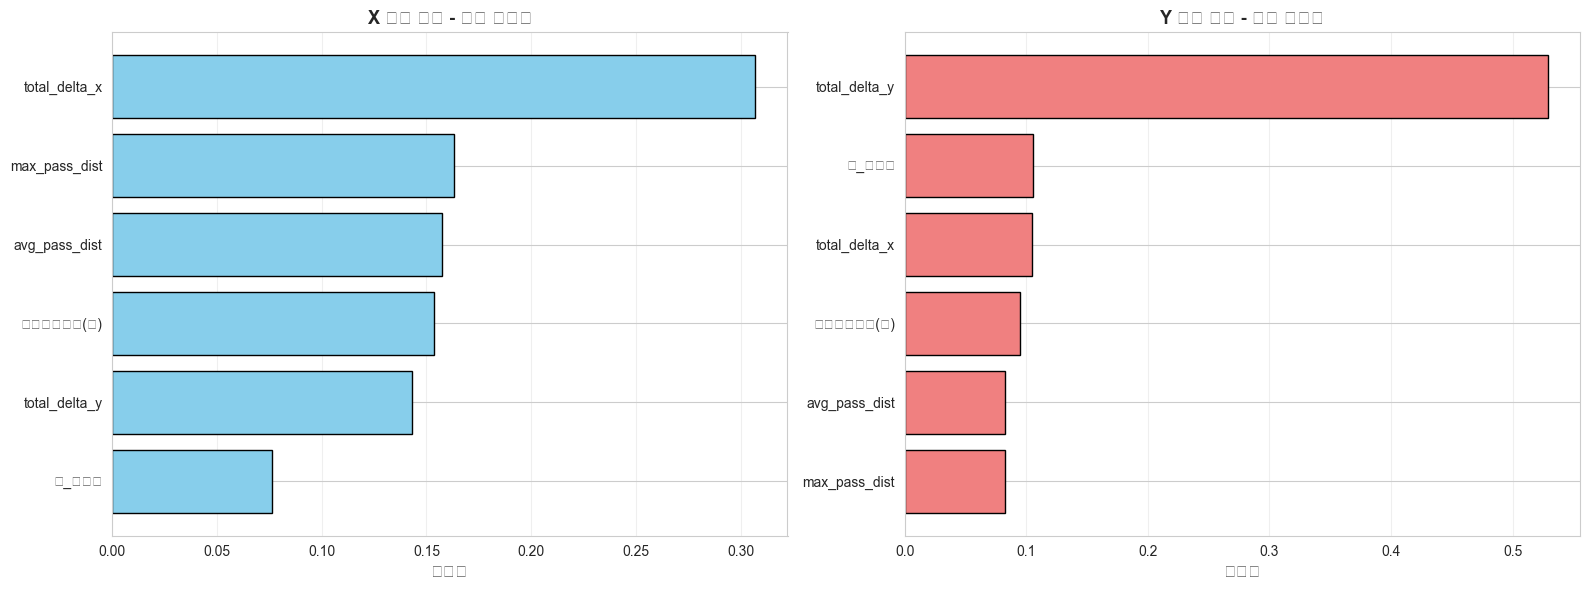


💡 X 좌표 예측에 가장 중요한 피처: total_delta_x
💡 Y 좌표 예측에 가장 중요한 피처: total_delta_y


In [17]:
# 피처 중요도 시각화
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# X 좌표
importance_x_sorted = importance_x.sort_values('중요도', ascending=True)
axes[0].barh(importance_x_sorted['피처'], importance_x_sorted['중요도'],
             color='skyblue', edgecolor='black')
axes[0].set_xlabel('중요도', fontsize=12)
axes[0].set_title('X 좌표 예측 - 피처 중요도', fontsize=13, fontweight='bold')
axes[0].grid(True, alpha=0.3, axis='x')

# Y 좌표
importance_y_sorted = importance_y.sort_values('중요도', ascending=True)
axes[1].barh(importance_y_sorted['피처'], importance_y_sorted['중요도'],
             color='lightcoral', edgecolor='black')
axes[1].set_xlabel('중요도', fontsize=12)
axes[1].set_title('Y 좌표 예측 - 피처 중요도', fontsize=13, fontweight='bold')
axes[1].grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

print(f"\n💡 X 좌표 예측에 가장 중요한 피처: {importance_x.iloc[0]['피처']}")
print(f"💡 Y 좌표 예측에 가장 중요한 피처: {importance_y.iloc[0]['피처']}")

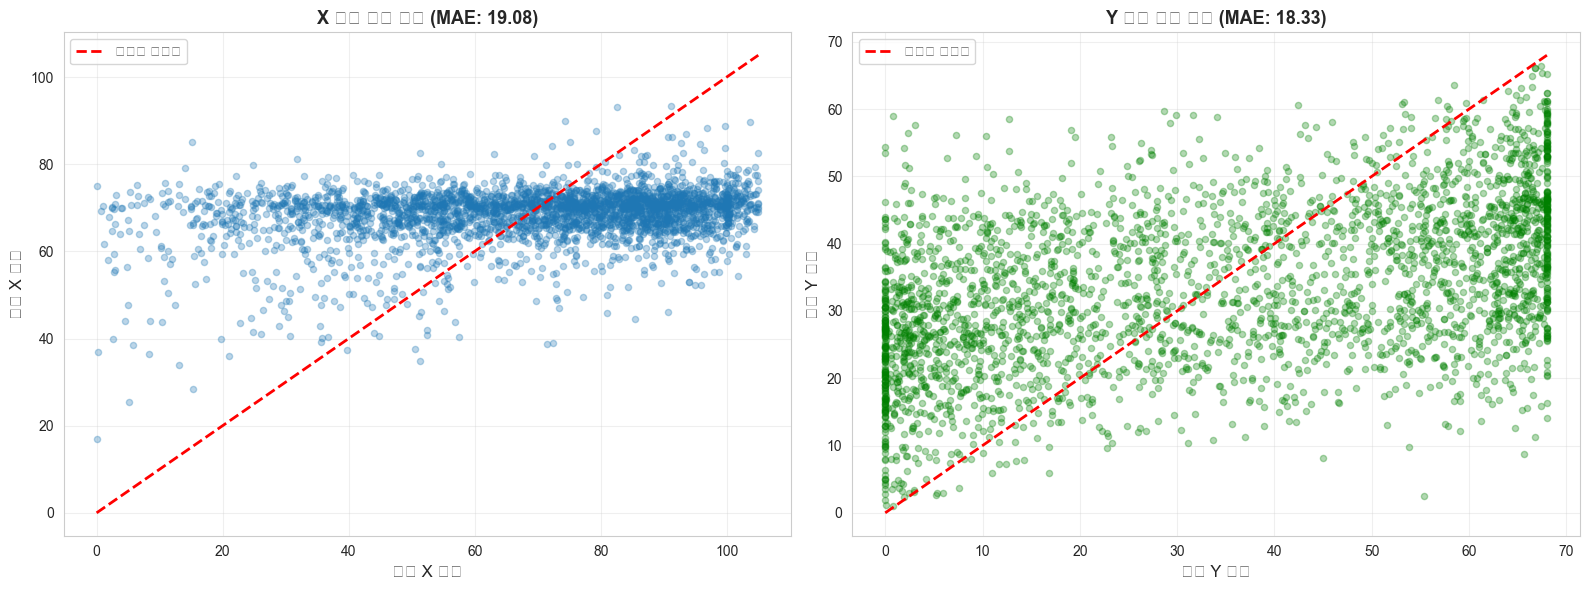

In [18]:
# 예측 결과 시각화
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# X 좌표 예측
axes[0].scatter(y_test_x, pred_x, alpha=0.3, s=20)
axes[0].plot([0, 105], [0, 105], 'r--', linewidth=2, label='완벽한 예측선')
axes[0].set_xlabel('실제 X 좌표', fontsize=12)
axes[0].set_ylabel('예측 X 좌표', fontsize=12)
axes[0].set_title(f'X 좌표 예측 결과 (MAE: {mae_x:.2f})', fontsize=13, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Y 좌표 예측
axes[1].scatter(y_test_y, pred_y, alpha=0.3, s=20, color='green')
axes[1].plot([0, 68], [0, 68], 'r--', linewidth=2, label='완벽한 예측선')
axes[1].set_xlabel('실제 Y 좌표', fontsize=12)
axes[1].set_ylabel('예측 Y 좌표', fontsize=12)
axes[1].set_title(f'Y 좌표 예측 결과 (MAE: {mae_y:.2f})', fontsize=13, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 6. 핵심 인사이트 정리

In [19]:
print("=" * 80)
print("핵심 인사이트")
print("=" * 80)

insights = f"""
1️⃣ 에피소드 복잡도의 영향
   - 짧은 에피소드(1-5액션): 최종 위치 분산 작음, 특정 패턴 존재
   - 긴 에피소드(16+액션): 최종 위치 분산 큼, 다양한 위치로 분산

2️⃣ 가장 중요한 피처
   - X 좌표: {importance_x.iloc[0]['피처']} (중요도: {importance_x.iloc[0]['중요도']:.3f})
   - Y 좌표: {importance_y.iloc[0]['피처']} (중요도: {importance_y.iloc[0]['중요도']:.3f})

3️⃣ 누적 이동량과 최종 위치
   - total_delta_x ↔ end_x 상관계수: {correlation_matrix.loc['total_delta_x', 'end_x']:.3f}
   - total_delta_y ↔ end_y 상관계수: {correlation_matrix.loc['total_delta_y', 'end_y']:.3f}
   - 누적 이동량이 최종 위치를 예측하는 핵심!

4️⃣ 경기장 구역 분포
   - 가장 많은 구역: {zone_df.iloc[0]['구역']} ({zone_df.iloc[0]['비율(%)']}%)
   - 특정 구역에 집중되는 경향

5️⃣ 베이스라인 모델 성능
   - X 좌표 MAE: {mae_x:.3f} (경기장 대비 {mae_x/105*100:.1f}%)
   - Y 좌표 MAE: {mae_y:.3f} (경기장 대비 {mae_y/68*100:.1f}%)
   - 간단한 통계 피처만으로도 어느정도 예측 가능!

🚀 개선 방향
   1. 시퀀스 정보 활용 (LSTM, Transformer)
   2. 시작 위치 정보 추가
   3. 선수/팀 임베딩
   4. 더 많은 피처 엔지니어링 (속도, 가속도, 패턴 등)
   5. 앙상블 모델
"""

print(insights)

핵심 인사이트

1️⃣ 에피소드 복잡도의 영향
   - 짧은 에피소드(1-5액션): 최종 위치 분산 작음, 특정 패턴 존재
   - 긴 에피소드(16+액션): 최종 위치 분산 큼, 다양한 위치로 분산

2️⃣ 가장 중요한 피처
   - X 좌표: total_delta_x (중요도: 0.307)
   - Y 좌표: total_delta_y (중요도: 0.529)

3️⃣ 누적 이동량과 최종 위치
   - total_delta_x ↔ end_x 상관계수: 0.108
   - total_delta_y ↔ end_y 상관계수: 0.383
   - 누적 이동량이 최종 위치를 예측하는 핵심!

4️⃣ 경기장 구역 분포
   - 가장 많은 구역: 공격_왼쪽 (21.48%)
   - 특정 구역에 집중되는 경향

5️⃣ 베이스라인 모델 성능
   - X 좌표 MAE: 19.079 (경기장 대비 18.2%)
   - Y 좌표 MAE: 18.333 (경기장 대비 27.0%)
   - 간단한 통계 피처만으로도 어느정도 예측 가능!

🚀 개선 방향
   1. 시퀀스 정보 활용 (LSTM, Transformer)
   2. 시작 위치 정보 추가
   3. 선수/팀 임베딩
   4. 더 많은 피처 엔지니어링 (속도, 가속도, 패턴 등)
   5. 앙상블 모델



## 7. 결과 저장

In [20]:
# 분석 결과 저장
print("=" * 80)
print("분석 결과 저장")
print("=" * 80)

# 구역 정보가 추가된 최종 패스 데이터
final_pass.to_csv('final_pass_with_zones.csv', index=False, encoding='utf-8-sig')
print("\n✅ final_pass_with_zones.csv 저장 완료")

# 모델링용 데이터
modeling_data.to_csv('modeling_features.csv', index=False, encoding='utf-8-sig')
print("✅ modeling_features.csv 저장 완료")

# 피처 중요도
importance_summary = pd.DataFrame({
    '피처': feature_cols,
    'X좌표_중요도': rf_x.feature_importances_,
    'Y좌표_중요도': rf_y.feature_importances_
}).sort_values('X좌표_중요도', ascending=False)

importance_summary.to_csv('feature_importance.csv', index=False, encoding='utf-8-sig')
print("✅ feature_importance.csv 저장 완료")

print("\n모든 분석 완료!")

분석 결과 저장

✅ final_pass_with_zones.csv 저장 완료
✅ modeling_features.csv 저장 완료
✅ feature_importance.csv 저장 완료

모든 분석 완료!
